<a href="https://colab.research.google.com/github/Victor-Coutinho/Simulador_Leitos/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

In [2]:
dataset = pd.read_csv('breast-cancerpro.data', header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


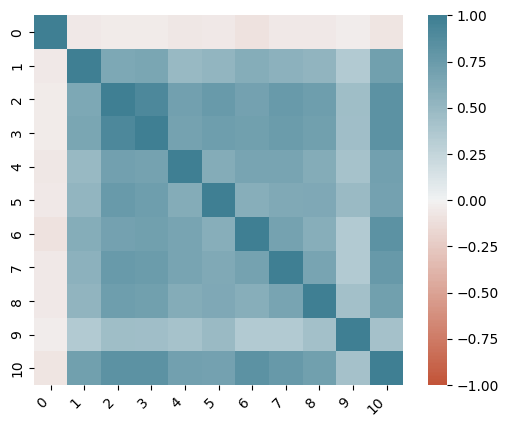

In [5]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
dataset.rename(columns={0: 'Id',
                        1: 'Clump_Thickness',
                        2: 'Uniformity_Cell_Sz',
                        3: 'Uniformity_Cell_Sha',
                        4: 'Marginal_Adhesion',
                        5: 'Epithelial_Cell_Sz',
                        6: 'Bare_Nuclei',
                        7: 'Bland_Chromatin',
                        8: 'Normal_Nucleoli',
                        9: 'Mitoses',
                       10: 'Class'}) # 2 for benign, 4 for malignan

,Id,Clump_Thickness,Uniformity_Cell_Sz,Uniformity_Cell_Sha,Marginal_Adhesion,Epithelial_Cell_Sz,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
dataset.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
1,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
2,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
3,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
4,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
5,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
6,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
7,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
8,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
9,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


In [ ]:
dataset.drop([0], axis=1, inplace=True)
dataset

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


<Axes: ylabel='Frequency'>

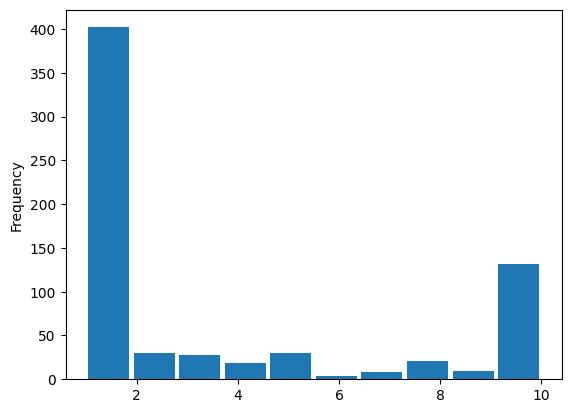

In [ ]:
dataset[6].plot.hist(rwidth=0.9)

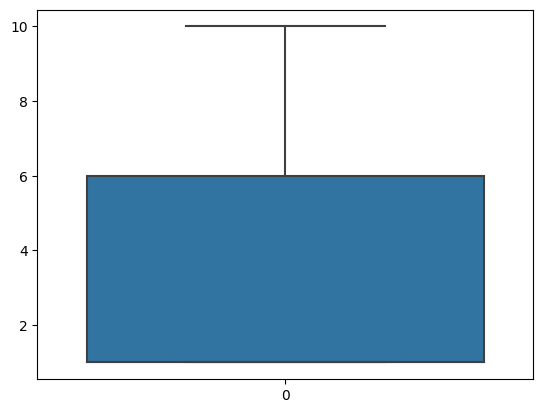

In [ ]:
ax = sns.boxplot(data=dataset[6])

In [ ]:
y = dataset[10]
dataset = dataset.drop([10], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(dataset, y, test_size=0.15,stratify = y)

In [ ]:
#K vizinhos
clf = KNeighborsClassifier(n_neighbors = 10)


In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
np.mean(scores)

0.9706896551724137

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,2,4,All
True,,,
2,66,1,67
4,2,34,36
All,68,35,103


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9677621283255087

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.9710084033613445

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        67
           4       0.97      0.94      0.96        36

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.97       103
weighted avg       0.97      0.97      0.97       103



Arvore de decisão


In [ ]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)

#clf = DecisionTreeClassifier(criterion = 'gini')


scores = cross_val_score(clf, X_train, y_train, cv=10)
np.mean(scores)

0.9293103448275863

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,2,4,All
True,,,
2,65,2,67
4,2,34,36
All,67,36,103


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      0.96      0.96        67
           4       0.92      0.94      0.93        36

    accuracy                           0.95       103
   macro avg       0.94      0.95      0.95       103
weighted avg       0.95      0.95      0.95       103



[Text(0.5, 0.8333333333333334, 'x[1] <= 3.5\ngini = 0.455\nsamples = 580\nvalue = [377, 203]'),
 Text(0.25, 0.5, 'x[5] <= 3.5\ngini = 0.144\nsamples = 397\nvalue = [366, 31]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.027\nsamples = 359\nvalue = [354, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.432\nsamples = 38\nvalue = [12, 26]'),
 Text(0.75, 0.5, 'x[1] <= 4.5\ngini = 0.113\nsamples = 183\nvalue = [11, 172]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.383\nsamples = 31\nvalue = [8, 23]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.039\nsamples = 152\nvalue = [3, 149]')]

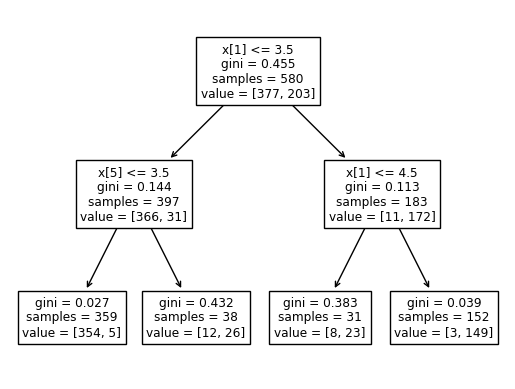

In [ ]:
plot_tree(clf)

Random Forest


In [ ]:
clf = RandomForestClassifier(max_depth=2, criterion = 'gini', 
                             n_estimators=50)

scores = cross_val_score(clf, X_train, y_train, cv=10)
np.mean(scores)

0.9689655172413794

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50)

In [ ]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,2,4,All
True,,,
2,67,0,67
4,2,34,36
All,69,34,103


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      1.00      0.99        67
           4       1.00      0.94      0.97        36

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103

